### Task 2b Q2

Line plot for question 2

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define colour palette (7 line plots)
colours = sns.color_palette("husl", 7)

In [14]:
#### CONVERT TEXT FILE TO PANDAS DATAFRAME

def convert_to_pd():
    log_dir = "../logs/part2b"

    index = ["parsec-dedup", "parsec-vips", "parsec-ferret", "parsec-radix", "parsec-blackscholes", "parsec-canneal", "parsec-freqmine"]
    df = pd.DataFrame(index=index)

    for i in [1, 2, 4, 8]:
        txt_file = log_dir + f"/parallel_log_{i}.txt"

        with open(txt_file, "r") as f:
            lines = f.readlines()
            series = pd.Series([float(line.split(": ")[1].strip()) for line in lines], index=[line.split(": ")[0].strip() for line in lines])
            df[f"thread = {i}"] = series

    # Convert the values into speedup
    df["thread = 2"] = df["thread = 1"] / df["thread = 2"]
    df["thread = 4"] = df["thread = 1"] / df["thread = 4"]
    df["thread = 8"] = df["thread = 1"] / df["thread = 8"]
    df["thread = 1"] = df["thread = 1"] / df["thread = 1"]

    return df

In [16]:
data = convert_to_pd()
data

,thread = 1,thread = 2,thread = 4,thread = 8
parsec-dedup,1.0,1.030367,1.494806,1.594500
parsec-vips,1.0,1.943553,3.872839,4.097970
parsec-ferret,1.0,1.968465,3.553011,4.122751
parsec-radix,1.0,1.992511,3.912155,5.931953
parsec-blackscholes,1.0,1.782365,2.942514,3.872450
parsec-canneal,1.0,1.726871,2.724459,3.170475
parsec-freqmine,1.0,1.921850,3.916423,4.817111


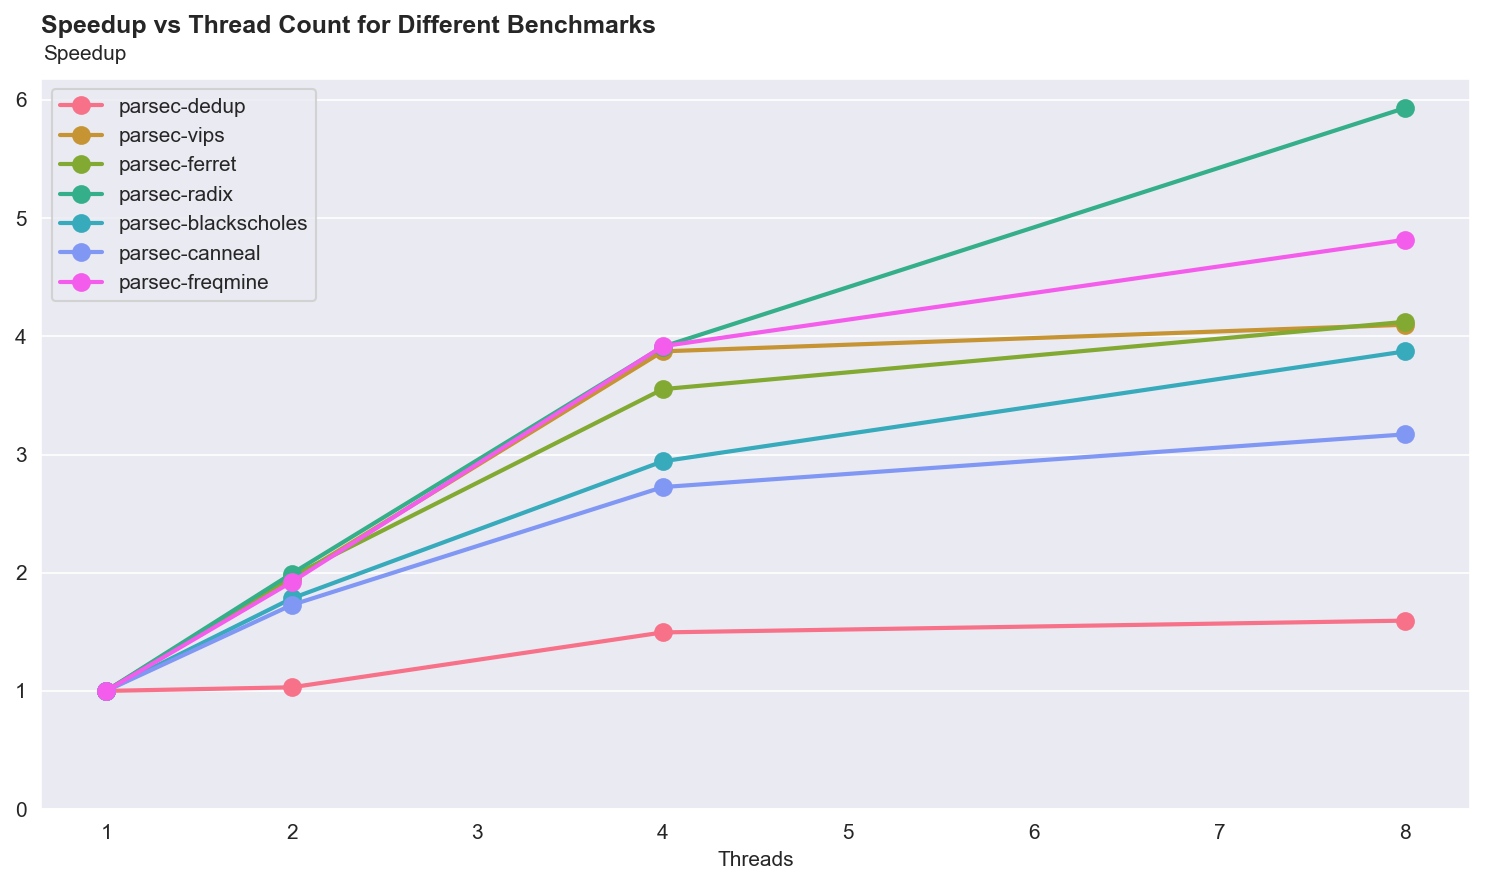

In [33]:
### LINE PLOT

threads = [1, 2, 4, 8]

# Set up plot style
plt.figure(figsize=(10, 6), dpi=150)
sns.set_style("darkgrid")

for idx, (benchmark_name, speedup_data) in enumerate(data.iterrows()):
    # Create main plot        
    plt.plot(threads, speedup_data,
            marker='o',
            linestyle='-',
            color=colours[idx],
            linewidth=2,
            markersize=8,
            label=f'{benchmark_name}')

# Configure titles and axes
plt.title("Speedup vs Thread Count for Different Benchmarks", loc='left', fontweight='bold', fontsize=12, family="Arial", pad=22)
plt.ylabel("Speedup", loc='top', rotation=0, fontsize=10, family="Arial")

plt.gca().yaxis.set_label_coords(0.060, 1.02)
plt.xlabel("Threads", fontsize=10, family='Arial')
plt.ylim(0, None)  # Not adding upper limit for individual plots so we can see any strange trends
plt.grid(axis='x')

# Add legend
plt.legend()

# Output
plt.tight_layout()
plt.savefig("../plots/speedup_task2b.png", format="png", dpi=300)

<Figure size 640x480 with 0 Axes>